<a href="https://colab.research.google.com/github/canerskrc/Borusan_Kod_Adi_Dijital/blob/main/borusan_day17_K_Means_musteri_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from typing import Tuple,Dict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [10]:
import matplotlib.pyplot as plt

In [11]:
RANDOM_STATE = 42

df = pd.read_csv("Mall_Customers.csv")
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
use_cols = ["age","annual_income_(k$)","spending_score_(1-100)"]

In [12]:
#Veri Temizliği
def basic_clean(df: pd.DataFrame) -> pd.DataFrame:
  df = df[(df['age'] >= 0) & (df["annual_income_(k$)"] >= 0 )]
  df = df[(df["spending_score_(1-100)"] >= 0) & (df["spending_score_(1-100)"] <= 100)]
  return df.reset_index(drop=True)
#Ölçekleme
def scale_features(df:pd.DataFrame) -> Tuple[np.ndarray, StandardScaler]:
  scaler = StandardScaler() #ortalama 0 , standart sapma 1 olacak şekilde dönüştürür.
  X = scaler.fit_transform(df.values)
  return X, scaler



In [13]:
def scan_kmeans(X: np.ndarray, kmin: int=2, kmax: int = 10) -> pd.DataFrame:
  results = []
  for k in range(kmin, kmax + 1 ):
    km = KMeans(n_clusters = k, n_init = 10, random_state=RANDOM_STATE)
    labels = km.fit_predict(X)
    inertia = km.inertia_
    sil = silhouette_score(X, labels)
    results.append({"k":k, "inertia":inertia, "silhouette": sil})
  return pd.DataFrame(results)

df = basic_clean(df)
X, _ = scale_features(df[use_cols])
metrics = scan_kmeans(X, kmin=2, kmax=10)
print(metrics)

    k     inertia  silhouette
0   2  389.386189    0.335472
1   3  295.212246    0.357793
2   4  205.225147    0.403958
3   5  168.247580    0.416643
4   6  133.868421    0.428417
5   7  117.011555    0.417232
6   8  103.873292    0.408207
7   9   93.092891    0.417693
8  10   82.385154    0.406554


In [14]:
def select_k(metrics: pd.DataFrame, strategy: str = "silhouette") -> int:
  if strategy == "silhouette":
    return int(metrics.loc[metrics["silhouette"].idxmax(), "k"])
  else:
    raise ValueError("Strateji sadece silhouette skoru destekliyor.")

In [15]:
def fit_kmeans(X: np.ndarray, k: int):
  km = KMeans(n_clusters = k, n_init= 10, random_state=RANDOM_STATE)
  labels = km.fit_predict(X)
  sil = silhouette_score(X, labels)
  return km, labels, sil

In [16]:
def fit_pca(X: np.ndarray, n_components: int=2):
  pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
  Z = pca.fit_transform(X) # fit ile PCA modeli X verisi üzerinden öğrenir. Kov. matr. öz değerler, özvektörler hesaplanır. transform veriyi bu yeni eksene yansıtır.
  return pca,Z

# PCA Mantığı

- Veriyi merkezler

X(centered) = X - X'

- Kovaryans matrisi hesaplar( iki değişkenin birlikte nasıl değiştiğini hesaplar)

1/(n-1)X(centered)^T.X(centered)

elde edilen matrisin köşegeni her özelliğin varyansı; diğer elemanlar değişkenler arası ilişkiyi ifade eder.

- Özdeğer & Özvektör ayrıştırması yapılır.

Sum(ÖV) = ÖD.ÖV

Özvektör ( principal comp. tam olarak burada yapılır )

- Bileşenleri sıralar

Özdeğerleri büyükten küçüğe sıralar.

In [17]:
def plot_k_scan(metrics: pd.DataFrame):
  fig, ax1 = plt.subplots()
  ax1.plot(metrics["k"], metrics["inertia"], marker="o")
  ax1.set_xlabel("k")
  ax1.set_ylabel("Inertia(WCSS)")
  ax1.set_title("Elbow ( Inertia)")
  plt.show()

  fig, ax1 = plt.subplots()
  ax1.plot(metrics["k"], metrics["silhouette"], marker="o")
  ax1.set_xlabel("k")
  ax1.set_ylabel("Silhouette")
  ax1.set_title("Silhouette Score")
  plt.show()

In [18]:
def plot_pca_clusters(Z: np.ndarray, labels: np.ndarray, title: str= "PCA(2D)- Kmeans"):
  for lab in np.unique(labels):
    idx = labels == lab
    plt.scatter(Z[idx, 0], Z[idx,1], s=40, alpha=0.7, label=f"Cluster {lab}")
  plt.legend()
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.title(title)
  plt.show()

In [21]:
def main():
  df = pd.read_csv("Mall_Customers.csv")


if __name__ == "__main__":
  main()

KeyError: 'age'

    k     inertia  silhouette
0   2  389.386189    0.335472
1   3  295.212246    0.357793
2   4  205.225147    0.403958
3   5  168.247580    0.416643
4   6  133.868421    0.428417
5   7  117.011555    0.417232
6   8  103.873292    0.408207
7   9   93.092891    0.417693
8  10   82.385154    0.406554
[Seçim] Silhouette'a göre en iyi k: 6


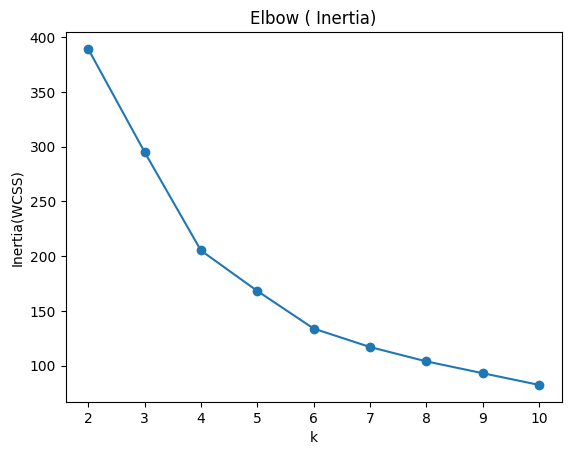

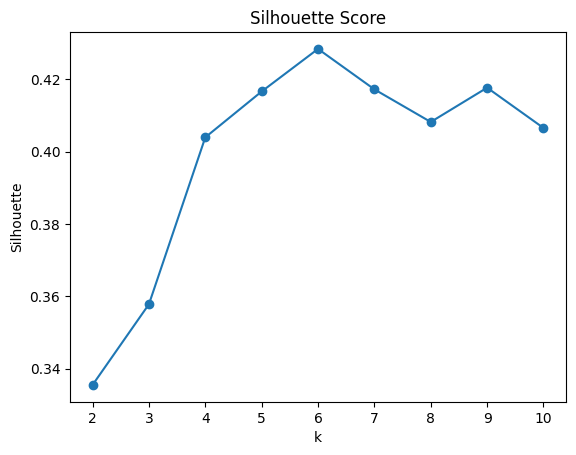

En son Silhouette: 0.428
PCA varyans oranları: [0.44266167 0.33308378]


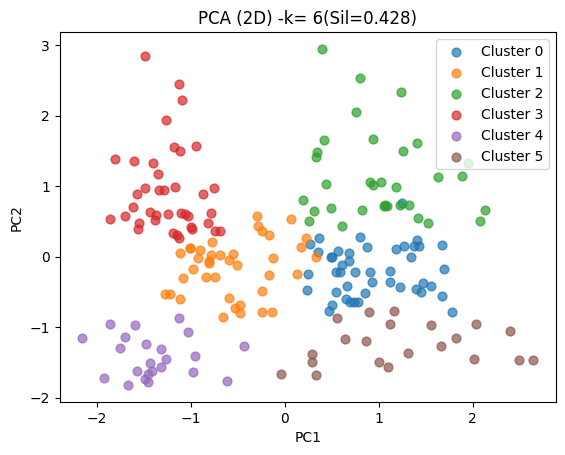

               age                annual_income_(k$)                  \
              mean median min max               mean median min  max   
cluster                                                                
0        56.333333   54.0  43  70          54.266667   54.0  38   79   
1        26.794872   26.0  18  40          57.102564   60.0  39   76   
2        41.939394   43.0  19  59          88.939394   86.0  71  137   
3        32.692308   32.0  27  40          86.538462   79.0  69  137   
4        25.000000   23.0  18  35          25.260870   24.0  15   39   
5        45.523810   46.0  20  67          26.285714   25.0  16   39   

        spending_score_(1-100)                 
                          mean median min max  
cluster                                        
0                    49.066667   49.0  35  60  
1                    48.128205   50.0  10  61  
2                    16.969697   16.0   1  39  
3                    82.128205   83.0  63  97  
4              

In [25]:
df = basic_clean(df)
X, _ = scale_features(df[use_cols])

metrics = scan_kmeans(X, kmin=2, kmax=10)
print(metrics)

best_k = select_k(metrics)
print(f"[Seçim] Silhouette'a göre en iyi k: {best_k}")

plot_k_scan(metrics)

km,labels,sil = fit_kmeans(X, best_k)
print(f"En son Silhouette: {sil:.3f}")

pca, Z = fit_pca(X, n_components=2)
print(f"PCA varyans oranları: {pca.explained_variance_ratio_}")

plot_pca_clusters(Z, labels, f"PCA (2D) -k= {best_k}(Sil={sil:.3f})")

out = df.copy()
out["cluster"] = labels
print(out.groupby("cluster")[use_cols].agg(["mean","median","min","max"]))

In [26]:
load = pd.DataFrame(
    pca.components_.T, #PCA fit edildikten sonra pca.components_ isimli bir matris döndürür. (n_components, n_features)
    columns = [f"PC{i+1}" for i in range(pca.n_components_)],
    index=["age","annual_income_(k$)","spending_score_(1-100)"]
)

print("PCA Bileşen Ağırlıkları")
print(load)

#PC1 = 0.71.age - 0.71.spending score


PCA Bileşen Ağırlıkları
                             PC1       PC2
age                     0.706382  0.030141
annual_income_(k$)     -0.048024  0.998832
spending_score_(1-100) -0.706199 -0.037775
